LINK CODE : https://github.com/radityanurfadillah/mini-workshop-recsys

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

Dataset yang digunakan pada workshop ini adalah MovieLens 100K.

In [2]:
link_ratings = "https://github.com/radityanurfadillah/mini-workshop-recsys/raw/main/data/ratings.csv"
link_movies = "https://github.com/radityanurfadillah/mini-workshop-recsys/raw/main/data/movies.csv"

# Load dataset into pandas dataframe format
ratings = pd.read_csv(link_ratings,sep=',')
movies = pd.read_csv(link_movies,sep=',')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


# Explore Dataset

In [7]:
len(ratings)

100836

In [8]:
len(movies)

9742

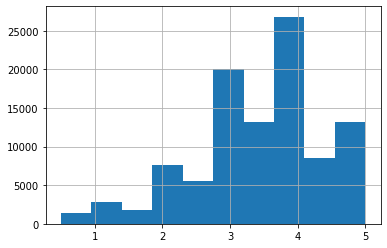

In [9]:
ratings.rating.hist()

In [10]:
np.sort(ratings.rating.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

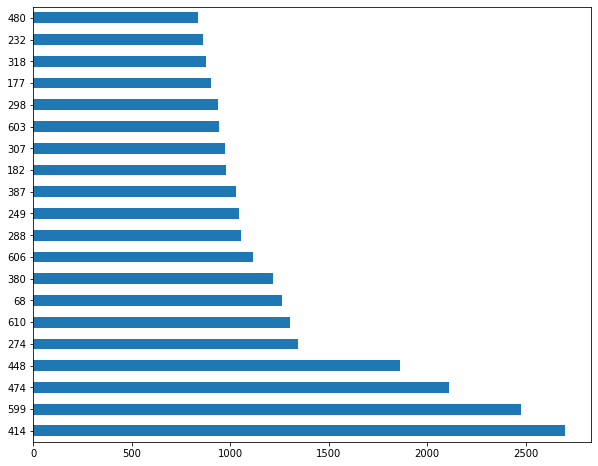

In [11]:
# Plot top20 user ratings count
plt.figure(figsize=(10, 8))
ratings["userId"].value_counts()[:20].plot(kind='barh')

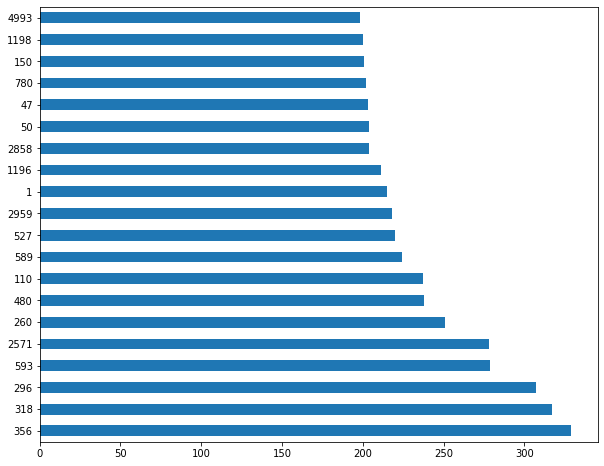

In [12]:
# Plot top20 movie ratings count
plt.figure(figsize=(10, 8))
ratings["movieId"].value_counts()[:20].plot(kind='barh')

In [13]:
ratings["movieId"].value_counts()[:20].index.tolist()

[356,
 318,
 296,
 593,
 2571,
 260,
 480,
 110,
 589,
 527,
 2959,
 1,
 1196,
 2858,
 50,
 47,
 780,
 150,
 1198,
 4993]

In [14]:
popular_movies = ratings["movieId"].value_counts()[:20].index.tolist()
for id in popular_movies:
  print(movies[movies["movieId"]==id]["title"].values[0])

Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)
Star Wars: Episode IV - A New Hope (1977)
Jurassic Park (1993)
Braveheart (1995)
Terminator 2: Judgment Day (1991)
Schindler's List (1993)
Fight Club (1999)
Toy Story (1995)
Star Wars: Episode V - The Empire Strikes Back (1980)
American Beauty (1999)
Usual Suspects, The (1995)
Seven (a.k.a. Se7en) (1995)
Independence Day (a.k.a. ID4) (1996)
Apollo 13 (1995)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Lord of the Rings: The Fellowship of the Ring, The (2001)


In [15]:
# YOUR CODE HERE

# Install Surprise Library

In [16]:
!pip install surprise

# Recommendation with Surprise Built-In Dataset

In [17]:
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
rmse = accuracy.rmse(predictions)

RMSE: 0.9355


In [18]:
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9413  0.9344  0.9263  0.9361  0.9404  0.9357  0.0054  
MAE (testset)     0.7418  0.7344  0.7319  0.7374  0.7424  0.7376  0.0041  
Fit time          4.82    4.81    4.89    4.86    5.02    4.88    0.08    
Test time         0.15    0.23    0.15    0.24    0.14    0.18    0.04    


In [19]:
results

{'fit_time': (4.815213441848755,
  4.813447713851929,
  4.894619464874268,
  4.856071949005127,
  5.018244981765747),
 'test_mae': array([0.741758  , 0.73442219, 0.7318987 , 0.73737663, 0.74236518]),
 'test_rmse': array([0.9413203 , 0.9344378 , 0.92633735, 0.93610678, 0.94044801]),
 'test_time': (0.14706659317016602,
  0.2299666404724121,
  0.14625215530395508,
  0.23882055282592773,
  0.144775390625)}

In [20]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.7375641412242893
Average RMSE:  0.9357300488400787


# Recommendation with Custom Dataset

In [21]:
df = ratings[["userId","movieId","rating"]]
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [22]:
min_rating = df["rating"].min()
max_rating = df["rating"].max()

print("Rating range: {0} to {1}".format(min_rating, max_rating))

Rating range: 0.5 to 5.0


In [23]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
rmse = accuracy.rmse(predictions)

RMSE: 0.8568


In [24]:
predictions[0]

Prediction(uid=325, iid=1517, r_ui=4.0, est=3.1730994846415386, details={'was_impossible': False})

In [25]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8762  0.8777  0.8730  0.8664  0.8735  0.8733  0.0039  
MAE (testset)     0.6716  0.6774  0.6690  0.6672  0.6702  0.6711  0.0035  
Fit time          5.00    4.90    4.99    4.93    4.98    4.96    0.04    
Test time         0.14    0.13    0.23    0.13    0.24    0.18    0.05    


In [26]:
results

{'fit_time': (5.001807928085327,
  4.904062747955322,
  4.9939374923706055,
  4.933856964111328,
  4.981884002685547),
 'test_mae': array([0.67160607, 0.67743586, 0.66895854, 0.66722818, 0.6702126 ]),
 'test_rmse': array([0.87616475, 0.87766482, 0.87297062, 0.86643761, 0.87349191]),
 'test_time': (0.1401076316833496,
  0.13492178916931152,
  0.23228001594543457,
  0.1332991123199463,
  0.236008882522583)}

In [27]:
print("Average MAE: ", np.average(results["test_mae"]))
print("Average RMSE: ", np.average(results["test_rmse"]))

Average MAE:  0.6710882475328536
Average RMSE:  0.873345943245112


# Comparison Among RecSys Algorithms

In [28]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# Define algo names
algo_names = ["SVD", "KNN"]

# Initiate variable for saving results
rmse_results = []
mae_results = []

for algo_name in algo_names:
  # Use algorithm based on algo names
  if algo_name == "SVD":
    algo = SVD()
  elif algo_name == "KNN":
    sim_options = {
        'name': 'cosine'
    }
    algo = KNNBasic(sim_options=sim_options)

  # Run 5-fold cross-validation and print results.
  results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  # Save results
  rmse_results.append(np.average(results["test_rmse"]))
  mae_results.append(np.average(results["test_mae"]))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8810  0.8771  0.8725  0.8712  0.8717  0.8747  0.0038  
MAE (testset)     0.6752  0.6758  0.6723  0.6698  0.6686  0.6724  0.0029  
Fit time          4.91    4.91    4.95    4.94    4.98    4.94    0.03    
Test time         0.13    0.13    0.23    0.14    0.25    0.18    0.05    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9691  0.9667  0.9694  0.9893  0.9758 

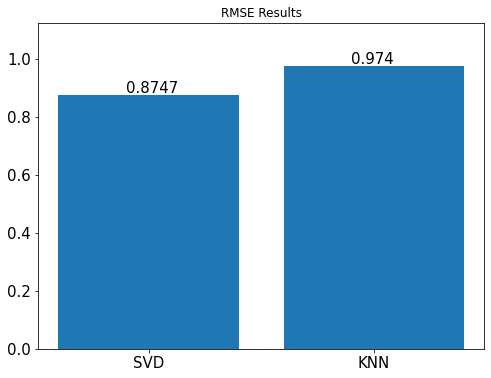

In [29]:
# Plot RMSE Results

plt.figure(figsize=(8, 6))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
# plt.xticks(rotation=50)
plt.bar(algo_names, rmse_results)
plt.title("RMSE Results")
for index, value in enumerate(rmse_results):
    plt.text(index-0.1, value+0.01, str(np.round(value,4)),fontsize=15)

scale_factor = 1.1
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.show()

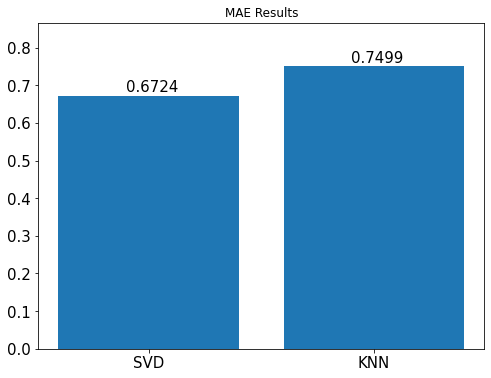

In [30]:
# Plot MAE Results

plt.figure(figsize=(8, 6))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
# plt.xticks(rotation=50)
plt.bar(algo_names, mae_results)
plt.title("MAE Results")
for index, value in enumerate(mae_results):
    plt.text(index-0.1, value+0.01, str(np.round(value,4)),fontsize=15)

scale_factor = 1.1
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.show()

# Hyperparameter Tuning

In [31]:
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [5, 10]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8781968063642438
{'n_factors': 20, 'n_epochs': 10}


In [32]:
best_factor = gs.best_params['rmse']['n_factors']
best_factor

20

In [33]:
best_epoch = gs.best_params['rmse']['n_epochs']
best_epoch

10

# Top-N Recommendation

In [34]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the dataset into Surprise format
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df, reader = reader)

# sample random trainset and testset
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

# We'll use the famous SVD algorithm.
algo = SVD(n_factors=best_factor, n_epochs=best_epoch)

# Train the algorithm on the trainset
algo.fit(trainset)

In [35]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [36]:
# Define user ID
userID = 1

In [37]:
# Get a list of all movie IDs from dataset
movie_ids = df["movieId"].unique()
movie_ids

array([     1,      3,      6, ..., 160836, 163937, 163981])

In [38]:
len(movie_ids)

9724

In [39]:
movie_ids_user = df.loc[df["userId"] == userID, "movieId"]
movie_ids_user

0         1
1         3
2         6
3        47
4        50
       ... 
227    3744
228    3793
229    3809
230    4006
231    5060
Name: movieId, Length: 232, dtype: int64

In [40]:
movie_ids_to_pred = np.setdiff1d(movie_ids, movie_ids_user)

In [41]:
test_set = [[userID, movie_id, 4] for movie_id in movie_ids_to_pred]

In [42]:
predictions = algo.test(test_set)

In [43]:
predictions[0]

Prediction(uid=1, iid=2, r_ui=4, est=4.2719731331235655, details={'was_impossible': False})

In [44]:
pred_ratings = np.array([pred.est for pred in predictions])
pred_ratings

array([4.27197313, 3.94463171, 3.73445546, ..., 4.22127669, 4.22127669,
       4.27565103])

In [45]:
n_items = 10

In [46]:
print("Top {0} item recommendations for user {1}:".format(n_items, userID))
index_max = (-pred_ratings).argsort()[:n_items]
for i in index_max:
    movie_id = movie_ids_to_pred[i]
    print(movies[movies["movieId"]==movie_id]["title"].values[0], pred_ratings[i])

Top 10 item recommendations for user 1:
Shawshank Redemption, The (1994) 5.0
Godfather, The (1972) 5.0
Dark Knight, The (2008) 5.0
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) 5.0
North by Northwest (1959) 4.98792855153415
Lawrence of Arabia (1962) 4.98685926433415
Casablanca (1942) 4.960319714024641
Cool Hand Luke (1967) 4.9372173950547085
Departed, The (2006) 4.935993209670484
Lost in Translation (2003) 4.9250389587697585


References:
- https://surprise.readthedocs.io/en/stable/getting_started.html
- https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b